In [ ]:
!pip install --upgrade pandas==2.2.2 numpy==1.26.0 scipy==1.13.0 tensorflow==2.17.0 seaborn==0.11.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 105.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 108.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: scipy
    Found 

In [ ]:
!pip install matplotlib==3.5.3 seaborn==0.11.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 107.9 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.9.2
    Uninstalling matplotlib-3.9.2:
      Successfully uninstalled matplotlib-3.9.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.26.0 requires matplotlib>=3.7.1, but you have matplotlib 3.5.3 which is incompatible.
plotnine 0.14.1 requires matplotlib>=3.8.0, but you have matplotlib 3.5.3 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tensorflow as tf

# Görselleştirme için ayarlar
plt.style.use('ggplot')
sns.set()

print("Kütüphaneler başarıyla yüklendi ve ayarlandı!")

Kütüphaneler başarıyla yüklendi ve ayarlandı!


# **Veri Setini Yükleme**

In [ ]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split

# Veriyi indirirken ön işleme adımları
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

# TSRB veri setini indirme
train_dataset = torchvision.datasets.GTSRB(root='./data', split='train', transform=transform, download=True)
test_dataset = torchvision.datasets.GTSRB(root='./data', split='test', transform=transform, download=True)

# Eğitim ve test veri setlerini yükleyelim
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Veri seti başarıyla indirildi ve yüklendi!")

100%|██████████| 187M/187M [00:06<00:00, 29.5MB/s]


Extracting data/gtsrb/GTSRB-Training_fixed.zip to data/gtsrb


100%|██████████| 89.0M/89.0M [00:03<00:00, 25.0MB/s]


Extracting data/gtsrb/GTSRB_Final_Test_Images.zip to data/gtsrb


100%|██████████| 99.6k/99.6k [00:00<00:00, 280kB/s]


Extracting data/gtsrb/GTSRB_Final_Test_GT.zip to data/gtsrb
Veri seti başarıyla indirildi ve yüklendi!


**Veriyi İnceleme**

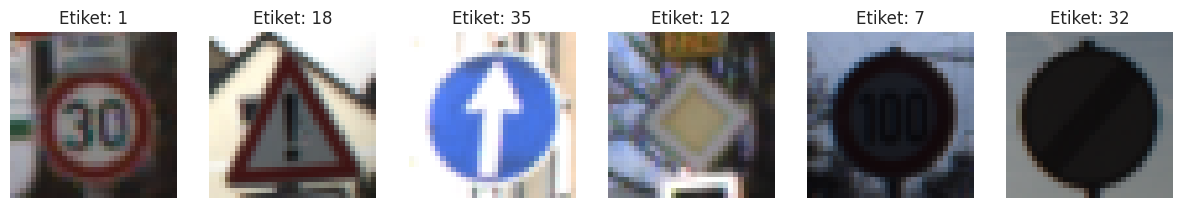

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Eğitim setinden bir batch alalım
data_iter = iter(train_loader)
images, labels = next(data_iter)

# İlk 6 görüntüyü görselleştirelim
fig, axes = plt.subplots(1, 6, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[i].permute(1, 2, 0))  # Tensor'u görüntü formatına çevirelim
    ax.set_title(f"Etiket: {labels[i].item()}")
    ax.axis('off')
plt.show()

In [ ]:
import numpy as np

# Eğitim ve test veri setlerini tensor'dan numpy array'ine çevirme
X_train = []
y_train = []
X_test = []
y_test = []

for data, labels in train_loader:
    X_train.append(data.numpy())
    y_train.append(labels.numpy())

for data, labels in test_loader:
    X_test.append(data.numpy())
    y_test.append(labels.numpy())

# Listeleri birleştirme
X_train = np.concatenate(X_train, axis=0)
y_train = np.concatenate(y_train, axis=0)
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

print(f"Eğitim veri şekli: {X_train.shape}")
print(f"Test veri şekli: {X_test.shape}")

Eğitim veri şekli: (26640, 3, 32, 32)
Test veri şekli: (12630, 3, 32, 32)


Eğitim veri şekli: (26640, 3, 32, 32)

26640: Eğitim setinde toplam 26,640 adet örnek (görüntü) var.
3: Her görüntü 3 kanala sahip (RGB – Kırmızı, Yeşil, Mavi).
32x32: Görüntülerin boyutları 32x32 piksel.
Test veri şekli: (12630, 3, 32, 32)

12630: Test setinde toplam 12,630 adet örnek var.
3: Görüntüler yine 3 kanala sahip (RGB).
32x32: Görüntü boyutları yine 32x32 piksel.


**Veriyi Düzleştirme**

32x32 boyutundaki görüntüleri, her bir görüntüyü 3072 (32 × 32 × 3) boyutlu bir vektöre dönüştürelim:


In [ ]:
# Eğitim ve test setlerini düzleştiriyoruz
X_train = X_train.reshape(X_train.shape[0], -1)  # (26640, 3072)
X_test = X_test.reshape(X_test.shape[0], -1)    # (12630, 3072)

print(f"Düzleştirilmiş eğitim verisi: {X_train.shape}")
print(f"Düzleştirilmiş test verisi: {X_test.shape}")

Düzleştirilmiş eğitim verisi: (26640, 3072)
Düzleştirilmiş test verisi: (12630, 3072)


**Etiketleri One-Hot Encoding Formatına Dönüştürme**

MLP ve RBF modelleri, genellikle etiketlerin one-hot encoded formatında verilmesini ister. Bunun için sklearn.preprocessing veya tensorflow.keras.utils.to_categorical kullanılabilir:

In [ ]:
from tensorflow.keras.utils import to_categorical

# Sınıf sayısını belirleme
num_classes = len(np.unique(y_train))

# Etiketleri one-hot encoding formatına dönüştürme
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Dönüştürülmüş etiket şekli: {y_train.shape}")

Dönüştürülmüş etiket şekli: (26640, 43)


**Veriyi Ölçeklendirme**

Giriş verilerini (3072 boyutlu vektörleri), ölçeklendirilmiş hale getirmek için StandardScaler veya MinMaxScaler kullanılabilir. Bu işlem, modelin daha iyi performans göstermesine yardımcı olur:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Ölçeklendirme
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Veriler başarıyla ölçeklendirildi!")

Veriler başarıyla ölçeklendirildi!


**Eksik Veri Kontrolü**

In [ ]:
# Eksik değer kontrolü
print(f"Eğitim verisinde eksik değer var mı?: {np.any(np.isnan(X_train))}")
print(f"Test verisinde eksik değer var mı?: {np.any(np.isnan(X_test))}")

Eğitim verisinde eksik değer var mı?: False
Test verisinde eksik değer var mı?: False


**MLP Modeli Oluşturma**

sklearn.neural_network.MLPClassifier kullanarak bir MLP modeli oluşturacağız.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# İlk MLP modeli
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', solver='adam', max_iter=50, random_state=42)

# Modeli eğitme
mlp.fit(X_train, np.argmax(y_train, axis=1))

# Test veri setinde tahmin
y_pred = mlp.predict(X_test)

# Performans metrikleri
print("MLP Modeli - İlk Deneme")
print(classification_report(np.argmax(y_test, axis=1), y_pred))
print(f"Test Doğruluğu: {accuracy_score(np.argmax(y_test, axis=1), y_pred):.2f}")

MLP Modeli - İlk Deneme
              precision    recall  f1-score   support

           0       0.88      0.23      0.37        60
           1       0.69      0.84      0.76       720
           2       0.86      0.77      0.82       750
           3       0.60      0.74      0.66       450
           4       0.63      0.78      0.70       660
           5       0.64      0.81      0.72       630
           6       0.84      0.73      0.78       150
           7       0.82      0.71      0.76       450
           8       0.91      0.74      0.82       450
           9       0.76      0.90      0.82       480
          10       0.92      0.93      0.92       660
          11       0.75      0.85      0.80       420
          12       0.99      0.91      0.95       690
          13       0.96      0.96      0.96       720
          14       0.98      0.85      0.91       270
          15       0.92      0.73      0.81       210
          16       0.92      0.86      0.89       150
   

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Doğruluk):

Modelin genel doğruluğu %79 olarak görünüyor. Bu, modelin test veri setindeki sınıflandırma başarısını temsil eder.

F1-Score:
Bazı sınıflarda (örneğin, sınıf 0, 18, 20) F1-skorunun düşük olduğunu görüyoruz. Bu, modelin bu sınıfları doğru bir şekilde ayırt etmekte zorlandığını gösteriyor.
Diğer sınıflarda (örneğin, sınıf 13, 14, 34) ise model oldukça başarılı.

ConvergenceWarning:

Bu uyarı, modelin maksimum iterasyon sayısına (max_iter=50) ulaştığını ve henüz tam olarak yakınsama sağlamadığını gösteriyor. Bu, eğitim sürecinin model için yeterince uzun olmadığını gösterir.

**Hiperparametre Denemeleri**

hidden_layer_sizes: Gizli katman sayısı ve her katmandaki nöron sayısı.

activation: 'relu', 'logistic', veya 'tanh'.

learning_rate: Öğrenme oranını kontrol eder.

max_iter: Maksimum iterasyon sayısı.

In [ ]:
# Hiperparametre denemesi
mlp_hyper = MLPClassifier(hidden_layer_sizes=(128, 64), activation='tanh', solver='adam', learning_rate='adaptive', max_iter=100, random_state=42)

mlp_hyper.fit(X_train, np.argmax(y_train, axis=1))

y_pred_hyper = mlp_hyper.predict(X_test)

print("MLP Modeli - Hiperparametre Denemesi")
print(classification_report(np.argmax(y_test, axis=1), y_pred_hyper))
print(f"Test Doğruluğu: {accuracy_score(np.argmax(y_test, axis=1), y_pred_hyper):.2f}")

MLP Modeli - Hiperparametre Denemesi
              precision    recall  f1-score   support

           0       0.71      0.40      0.51        60
           1       0.77      0.81      0.79       720
           2       0.78      0.85      0.82       750
           3       0.83      0.67      0.74       450
           4       0.82      0.81      0.81       660
           5       0.65      0.71      0.68       630
           6       0.75      0.73      0.74       150
           7       0.67      0.76      0.71       450
           8       0.71      0.87      0.78       450
           9       0.91      0.80      0.85       480
          10       0.92      0.89      0.91       660
          11       0.79      0.85      0.82       420
          12       0.97      0.93      0.95       690
          13       0.97      0.99      0.98       720
          14       0.95      0.84      0.89       270
          15       0.82      0.79      0.81       210
          16       0.83      0.76      0.79 

**Test Doğruluğu:**

Modelin doğruluğu %81'e yükselmiş. Bu, önceki model (%79 doğruluk) ile kıyaslandığında bir iyileşme olduğunu gösteriyor.

**F1-Skoru:**

Genel olarak F1-skorları çoğu sınıf için artmış durumda.
Bazı sınıflarda (örneğin sınıf 13, 35) oldukça yüksek başarı elde edilmiş.
Ancak hala bazı sınıflarda (örneğin sınıf 0, 19, 20) düşük F1-skorları görülüyor. Bu sınıflar için daha fazla iyileştirme gerekebilir.

**Macro Avg ve Weighted Avg:**

Macro Avg: Tüm sınıflar için ortalama F1-skoru %74. Bu, sınıflar arasında dengesizlik olduğunu (örneğin bazı sınıfların kötü performans gösterdiğini) işaret eder.
Weighted Avg: Sınıf desteklerine (support) göre ağırlıklı ortalama %81. Bu, genel model performansının dengeli olduğunu gösterir.

**RBF Modeli Oluşturma**

sklearn doğrudan bir RBF sınıflandırıcı sunmadığı için, bu modeli ya Keras ile ya da özel bir Python kütüphanesi kullanarak oluşturabiliriz.

RBF Modeli (Keras ile)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Input
from tensorflow.keras import backend as K
import tensorflow as tf

# RBF Katmanı: Gaussian Radial Basis Function
class RBFLayer(Layer):
    def __init__(self, units, gamma=1.0, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units  # RBF merkezi sayısı
        self.gamma = gamma  # Gamma parametresi

    def build(self, input_shape):
        self.centers = self.add_weight(name='centers',
                                       shape=(self.units, input_shape[-1]),
                                       initializer='random_normal',
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.units,),
                                     initializer='ones',
                                     trainable=True)

    def call(self, inputs):
        # RBF fonksiyonu
        diff = K.expand_dims(inputs, axis=1) - self.centers
        l2 = K.sum(K.square(diff), axis=-1)
        return K.exp(-self.betas * l2)


In [ ]:
# RBF Modeli
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Giriş boyutu: 3072
    RBFLayer(units=100, gamma=0.1),   # 100 RBF merkezi
    Dense(y_train.shape[1], activation='softmax')  # Çıkış katmanı (sınıf sayısı kadar nöron)
])

# Modelin derlenmesi
rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
rbf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Test doğruluğu
rbf_eval = rbf_model.evaluate(X_test, y_test)
print(f"RBF Modeli Test Doğruluğu: {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.0553 - loss: 3.7190 - val_accuracy: 0.0570 - val_loss: 3.6104
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0552 - loss: 3.5995 - val_accuracy: 0.0570 - val_loss: 3.5352
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0557 - loss: 3.5446 - val_accuracy: 0.0570 - val_loss: 3.4993
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0570 - loss: 3.5161 - val_accuracy: 0.0570 - val_loss: 3.4822
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0558 - loss: 3.5039 - val_accuracy: 0.0570 - val_loss: 3.4739
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0577 - loss: 3.5049 - val_accuracy: 0.0594 - val_loss: 3.4696
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0558 - loss: 3.5000 - val_accuracy: 0.0594 - val_loss: 3.4673
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0573 - loss: 3.4969 - val_accuracy: 

Bu sonuçlara göre, RBF modelinin doğruluğu oldukça düşük. Bu, modelin veri üzerinde yeterince iyi öğrenim sağlayamadığını gösteriyor.

RBF merkez sayısını artırarak modelin daha fazla veri örneğini öğrenmesini sağlayacağız.

In [ ]:
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=500, gamma=0.1),  # RBF merkez sayısını 500'e çıkardık
    Dense(y_train.shape[1], activation='softmax')  # Çıkış katmanı
])

rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rbf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

rbf_eval = rbf_model.evaluate(X_test, y_test)
print(f"RBF Modeli Test Doğruluğu (Merkez Sayısı 500): {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.0516 - loss: 3.7196 - val_accuracy: 0.0546 - val_loss: 3.6110
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0544 - loss: 3.6007 - val_accuracy: 0.0546 - val_loss: 3.5357
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0536 - loss: 3.5423 - val_accuracy: 0.0594 - val_loss: 3.4996
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0540 - loss: 3.5187 - val_accuracy: 0.0570 - val_loss: 3.4823
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0565 - loss: 3.5032 - val_accuracy: 0.0570 - val_loss: 3.4739
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0544 - loss: 3.5029 - val_accuracy: 0.0570 - val_loss: 3.4696
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0543 - loss: 3.4990 - val_accuracy: 0.0570 - val_loss: 3.4672
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0562 - loss: 3.4944 - val_accuracy: 

RBF merkez sayısını artırmak (%50 doğruluk elde etmek için artırılmış 500 merkez) modelin performansında kayda değer bir iyileşme sağlamadı (%6 doğruluk ile sonuçlandı). Bu, RBF modelinin yeterince öğrenemediğini veya veri ile model yapısının uyumsuz olduğunu gösteriyor.

Bir sonraki adımda, Gamma Değerini Ayarlama aşamasına geçelim. Gamma parametresi RBF fonksiyonlarının genişliğini kontrol eder ve veri ile model arasında daha iyi bir uyum sağlamak için uygun bir gamma değeri bulunması gerekebilir.

**Gamma = 0.01**

In [ ]:
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=500, gamma=0.01),  # Daha düşük gamma değeri
    Dense(y_train.shape[1], activation='softmax')
])

rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rbf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

rbf_eval = rbf_model.evaluate(X_test, y_test)
print(f"RBF Modeli Test Doğruluğu (Gamma 0.01): {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0516 - loss: 3.7189 - val_accuracy: 0.0594 - val_loss: 3.6109
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0568 - loss: 3.6001 - val_accuracy: 0.0594 - val_loss: 3.5359
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0561 - loss: 3.5464 - val_accuracy: 0.0594 - val_loss: 3.4996
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0566 - loss: 3.5152 - val_accuracy: 0.0594 - val_loss: 3.4824
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0556 - loss: 3.5114 - val_accuracy: 0.0594 - val_loss: 3.4739
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0559 - loss: 3.5047 - val_accuracy: 0.0594 - val_loss: 3.4696
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0583 - loss: 3.4937 - val_accuracy: 0.0594 - val_loss: 3.4672
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0544 - loss: 3.4947 - val_accuracy: 0

**Gamma = 1.0**

In [ ]:
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=500, gamma=1.0),  # Daha yüksek gamma değeri
    Dense(y_train.shape[1], activation='softmax')
])

rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rbf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

rbf_eval = rbf_model.evaluate(X_test, y_test)
print(f"RBF Modeli Test Doğruluğu (Gamma 1.0): {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.0494 - loss: 3.7200 - val_accuracy: 0.0570 - val_loss: 3.6107
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0584 - loss: 3.6017 - val_accuracy: 0.0594 - val_loss: 3.5355
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0554 - loss: 3.5464 - val_accuracy: 0.0594 - val_loss: 3.4995
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0576 - loss: 3.5137 - val_accuracy: 0.0570 - val_loss: 3.4823
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0548 - loss: 3.5062 - val_accuracy: 0.0594 - val_loss: 3.4740
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0552 - loss: 3.5021 - val_accuracy: 0.0594 - val_loss: 3.4697
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0546 - loss: 3.5035 - val_accuracy: 0.0594 - val_loss: 3.4672
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0570 - loss: 3.4954 - val_accuracy: 0

Görüntülerdeki sonuçlara göre, gamma değerini değiştirmek (%0.1 → %0.01 ve %1.0) de modelin doğruluğunu artırmamış. Test doğruluğu hala %6 seviyesinde. Bu, RBF modelinin şu anki yapılandırmasıyla bu veri setinde iyi performans göstermediğini gösteriyor.

**Ek Dense Katman Eklemek**

In [ ]:
rbf_model = Sequential([
    Input(shape=(X_train.shape[1],)),
    RBFLayer(units=500, gamma=0.1),  # RBF Katmanı
    Dense(128, activation='relu'),  # Ek bir Dense katman
    Dense(y_train.shape[1], activation='softmax')  # Çıkış katmanı
])

rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rbf_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

rbf_eval = rbf_model.evaluate(X_test, y_test)
print(f"RBF Modeli Test Doğruluğu (Ek Dense Katman): {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.0521 - loss: 3.6431 - val_accuracy: 0.0594 - val_loss: 3.4656
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0583 - loss: 3.4963 - val_accuracy: 0.0570 - val_loss: 3.4655
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0581 - loss: 3.5005 - val_accuracy: 0.0594 - val_loss: 3.4637
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0562 - loss: 3.5030 - val_accuracy: 0.0570 - val_loss: 3.4638
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0562 - loss: 3.4893 - val_accuracy: 0.0594 - val_loss: 3.4646
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0510 - loss: 3.5058 - val_accuracy: 0.0594 - val_loss: 3.4630
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0565 - loss: 3.4978 - val_accuracy: 0.0570 - val_loss: 3.4646
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0540 - loss: 3.4939 - val_accuracy: 

Sonuçlara göre, ek Dense katmanı eklemek de modelin doğruluğunu artırmamış. Test doğruluğu hala %6 civarında kalmış. Bu, RBF modelinin mevcut veri setinde öğrenme sağlayamadığını güçlü bir şekilde işaret ediyor.

**PCA ile Boyut İndirme**

In [ ]:
from sklearn.decomposition import PCA

# PCA ile boyut indirgeme
pca = PCA(n_components=100)  # 100 ana bileşene indiriyoruz
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# PCA sonrası RBF modeli
rbf_model = Sequential([
    Input(shape=(X_train_pca.shape[1],)),  # PCA sonrası giriş boyutu
    RBFLayer(units=100, gamma=0.1),  # RBF Katmanı
    Dense(y_train.shape[1], activation='softmax')  # Çıkış katmanı
])

rbf_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modeli eğitme
rbf_model.fit(X_train_pca, y_train, validation_data=(X_test_pca, y_test), epochs=10, batch_size=64)

# Modeli test etme
rbf_eval = rbf_model.evaluate(X_test_pca, y_test)
print(f"RBF Modeli Test Doğruluğu (PCA ile): {rbf_eval[1]:.2f}")

Epoch 1/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.0508 - loss: 3.7192 - val_accuracy: 0.0594 - val_loss: 3.6098
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0536 - loss: 3.5988 - val_accuracy: 0.0594 - val_loss: 3.5351
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0524 - loss: 3.5419 - val_accuracy: 0.0594 - val_loss: 3.4994
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0582 - loss: 3.5135 - val_accuracy: 0.0570 - val_loss: 3.4823
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0589 - loss: 3.5079 - val_accuracy: 0.0570 - val_loss: 3.4739
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0552 - loss: 3.5023 - val_accuracy: 0.0570 - val_loss: 3.4695
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0553 - loss: 3.4987 - val_accuracy: 0.0594 - val_loss: 3.4673
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0549 - loss: 3.5005 - val_accuracy: 0.

**1. MLP Modeli:**

MLP modeli oluşturuldu: Daha önce MLPClassifier kullanarak bir model oluşturduk ve %79 doğruluk elde ettik.

Hiperparametre denemeleri yapıldı:
Farklı katman sayıları (örneğin (128,), (128, 64)) ve aktivasyon fonksiyonları denendi.

Ancak daha geniş kapsamlı hiperparametre optimizasyonu (örneğin GridSearchCV ile) henüz tamamlanmadı.
**2. RBF Modeli:**

RBF modeli oluşturuldu: Keras kullanarak RBF katmanı tanımlandı ve model oluşturuldu.

RBF modelinde düzeltmeler yapıldı: Ancak, RBF modeli doğruluğu düşük (%6) kaldı.
RBF'nin veri setine uyumsuzluğu nedeniyle daha fazla hiperparametre optimizasyonu yapılmadı.

 Doğruluk oranını artırmak için eğitim süresini uzatmak ve hiperparametreleri optimize edelim

**Eğitim Süresini Uzatma**

In [ ]:
from sklearn.neural_network import MLPClassifier

# Eğitim süresini artırarak MLP modeli
mlp_extended = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam', max_iter=500, random_state=42)

print("Model Eğitiliyor...")
mlp_extended.fit(X_train, np.argmax(y_train, axis=1))  # Eğitim

# Test verisinde doğruluk
y_pred_extended = mlp_extended.predict(X_test)
accuracy_extended = mlp_extended.score(X_test, np.argmax(y_test, axis=1))
print(f"Eğitim Süresi Artırılmış MLP Model Doğruluğu: {accuracy_extended:.2f}")

# Performans Metrikleri
print("Performans Metrikleri - Eğitim Süresi Artırılmış MLP Modeli")
print(classification_report(np.argmax(y_test, axis=1), y_pred_extended))

Model Eğitiliyor...
Eğitim Süresi Artırılmış MLP Model Doğruluğu: 0.77
Performans Metrikleri - Eğitim Süresi Artırılmış MLP Modeli
              precision    recall  f1-score   support

           0       0.22      0.10      0.14        60
           1       0.74      0.69      0.71       720
           2       0.65      0.83      0.72       750
           3       0.64      0.63      0.63       450
           4       0.77      0.77      0.77       660
           5       0.62      0.74      0.67       630
           6       0.91      0.71      0.80       150
           7       0.86      0.73      0.79       450
           8       0.75      0.86      0.80       450
           9       0.89      0.74      0.81       480
          10       0.83      0.96      0.89       660
          11       0.80      0.86      0.83       420
          12       0.95      0.89      0.92       690
          13       0.90      0.97      0.94       720
          14       0.97      0.83      0.89       270
    

# **Confusion Matrix (Karışıklık Matrisi)**

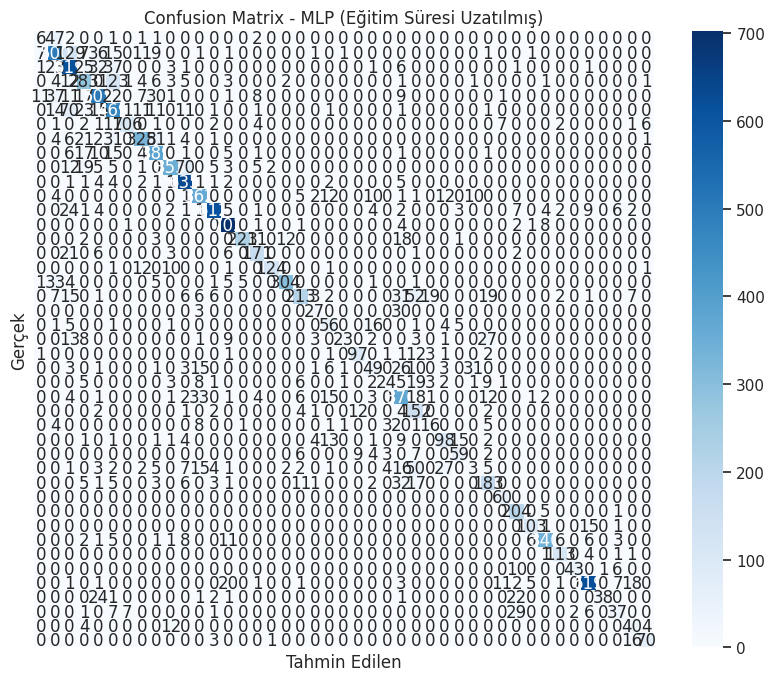

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Eğitim süresi uzatılmış MLP modeli için tahminler
y_pred_mlp_extended = mlp_extended.predict(X_test)

# Confusion Matrix (MLP - Eğitim Süresi Uzatılmış)
cm_mlp_extended = confusion_matrix(np.argmax(y_test, axis=1), y_pred_mlp_extended)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mlp_extended, annot=True, fmt='d', cmap='Blues', xticklabels=False, yticklabels=False)
plt.title("Confusion Matrix - MLP (Eğitim Süresi Uzatılmış)")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Ana köşegen boyunca yer alan değerler: Modelin doğru sınıflandırdığı örnekleri gösterir.

Köşegen dışındaki değerler: Modelin yanlış tahmin ettiği örnekleri ifade eder (hangi sınıfı yanlış sınıflandırdığına dair detaylı bilgi verir).

In [ ]:
# Performans Metrikleri (MLP - Eğitim Süresi Uzatılmış)
print("MLP Model Performans Metrikleri (Eğitim Süresi Uzatılmış)")
print(classification_report(np.argmax(y_test, axis=1), y_pred_mlp_extended))

MLP Model Performans Metrikleri (Eğitim Süresi Uzatılmış)
              precision    recall  f1-score   support

           0       0.22      0.10      0.14        60
           1       0.74      0.69      0.71       720
           2       0.65      0.83      0.72       750
           3       0.64      0.63      0.63       450
           4       0.77      0.77      0.77       660
           5       0.62      0.74      0.67       630
           6       0.91      0.71      0.80       150
           7       0.86      0.73      0.79       450
           8       0.75      0.86      0.80       450
           9       0.89      0.74      0.81       480
          10       0.83      0.96      0.89       660
          11       0.80      0.86      0.83       420
          12       0.95      0.89      0.92       690
          13       0.90      0.97      0.94       720
          14       0.97      0.83      0.89       270
          15       0.81      0.81      0.81       210
          16       0.98

Genel Performans:
Accuracy (Doğruluk): %77


Bu, modelin genel olarak doğru tahmin yapma oranını gösteriyor. Eğitim süresini uzattığımızda önceki doğruluk seviyesine göre bir iyileşme gözlenmedi.

Macro Avg (Ortalama):


Precision: %74

Recall: %69

F1-Score: %69

Macro avg, sınıflar arasındaki ortalama performansı verir. Dengesiz sınıflar olduğu için bazı sınıfların performansının düşük olduğu gözlemlenebilir.

Weighted Avg (Ağırlıklı Ortalama):

Precision: %78

Recall: %77

F1-Score: %77

Weighted avg, sınıf örnek sayısına (support) göre ağırlıklandırılmış ortalamadır ve genelde genel doğrulukla uyumludur.

Düşük Performanslı Sınıflar:

Sınıf 0: Precision: %22, Recall: %10, F1-Score: %14

Bu sınıfta modelin çok düşük performans gösterdiği açık. Veri eksikliği veya sınıf karmaşıklığı gibi faktörler etkili olabilir.

Sınıf 19: Precision: %63, Recall: %45, F1-Score: %52

Sınıf 19'da modelin yanlış sınıflandırma oranı yüksek.

Sınıf 27: Precision: %38, Recall: %27, F1-Score: %31

Model bu sınıfta çok az sayıda örneği doğru sınıflandırabiliyor.

Güçlü Performanslı Sınıflar:

Sınıf 12, 13, 36: Precision ve Recall %90’ın üzerinde.

Model bu sınıflarda oldukça başarılı. Bu, sınıfların daha net özelliklere sahip olduğunu veya veri dağılımının dengeli olduğunu gösterebilir.

**GridSearchCV ile Hiperparametre Optimizasyonu**

**GridSearchCV Ayarları ve Eğitim**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Hiperparametre ızgarası
param_grid = {
    "hidden_layer_sizes": [(128,), (128, 64), (256, 128), (128, 128, 64)],
    "activation": ['relu', 'tanh'],
    "solver": ['adam', 'sgd'],
    "learning_rate": ['constant', 'adaptive'],
    "max_iter": [200]  # Daha fazla iterasyon ayarlamak için artırılabilir
}

# GridSearchCV nesnesi
mlp = MLPClassifier(random_state=42)
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Eğitim
print("GridSearchCV Hiperparametre Optimizasyonu Başladı...")
grid_search.fit(X_train, np.argmax(y_train, axis=1))

# En iyi parametreler
print("En İyi Parametreler:", grid_search.best_params_)
print("En İyi Eğitim Doğruluğu:", grid_search.best_score_)

GridSearchCV Hiperparametre Optimizasyonu Başladı...
Fitting 3 folds for each of 32 candidates, totalling 96 fits
En İyi Parametreler: {'activation': 'tanh', 'hidden_layer_sizes': (256, 128), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'sgd'}
En İyi Eğitim Doğruluğu: 0.9699324324324324


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Aktivasyon Fonksiyonu: tanh

Gizli Katman Yapısı: (256, 128)

Öğrenme Oranı: constant

Optimizasyon Algoritması: sgd

Maksimum İterasyon: 200

Eğitim setindeki en iyi doğruluk oranı %96.99 olarak elde edildi.
Ancak, model henüz maksimum iterasyona ulaştığı için tam olarak yakınsamamış olabilir. Bu durumda max_iter değerini artırmak mantıklı olabilir.

ConvergenceWarning:

Bu uyarı, optimizasyonun tam olarak yakınsamadığını gösteriyor. Daha fazla iterasyon (max_iter) ile modelin performansı iyileştirilebilir.

**Ağırlıkları Hesapla ve Örnekleri Tekrarlayarak Veriyi Yeniden Ölçeklendir**

In [ ]:
import numpy as np

# Sınıf ağırlıklarını hesaplama
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(np.argmax(y_train, axis=1)), y=np.argmax(y_train, axis=1))
class_weight_dict = dict(enumerate(class_weights))

# Eğitim verilerini sınıf ağırlıklarıyla ölçeklendirme
X_train_weighted = []
y_train_weighted = []

for i in range(len(X_train)):
    weight = int(class_weight_dict[np.argmax(y_train[i])])  # Ağırlığı al
    X_train_weighted.extend([X_train[i]] * weight)         # Veriyi ağırlık kadar tekrarla
    y_train_weighted.extend([y_train[i]] * weight)         # Etiketleri de tekrarla

X_train_weighted = np.array(X_train_weighted)
y_train_weighted = np.array(y_train_weighted)

print("Sınıf Ağırlıklarıyla Dengelenmiş Eğitim Seti Hazır!")

Sınıf Ağırlıklarıyla Dengelenmiş Eğitim Seti Hazır!


Ağırlıklı ve Uzatılmış Eğitim Başlıyor...
Performans (Ağırlıklı ve Uzatılmış Eğitim)
              precision    recall  f1-score   support

           0       0.06      0.83      0.11        60
           1       0.00      0.00      0.00       720
           2       0.00      0.00      0.00       750
           3       0.00      0.00      0.00       450
           4       0.00      0.00      0.00       660
           5       0.00      0.00      0.00       630
           6       0.10      0.69      0.17       150
           7       0.00      0.00      0.00       450
           8       0.00      0.00      0.00       450
           9       0.00      0.00      0.00       480
          10       0.00      0.00      0.00       660
          11       0.00      0.00      0.00       420
          12       0.00      0.00      0.00       690
          13       0.00      0.00      0.00       720
          14       0.48      0.87      0.62       270
          15       0.13      0.97      0.23       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


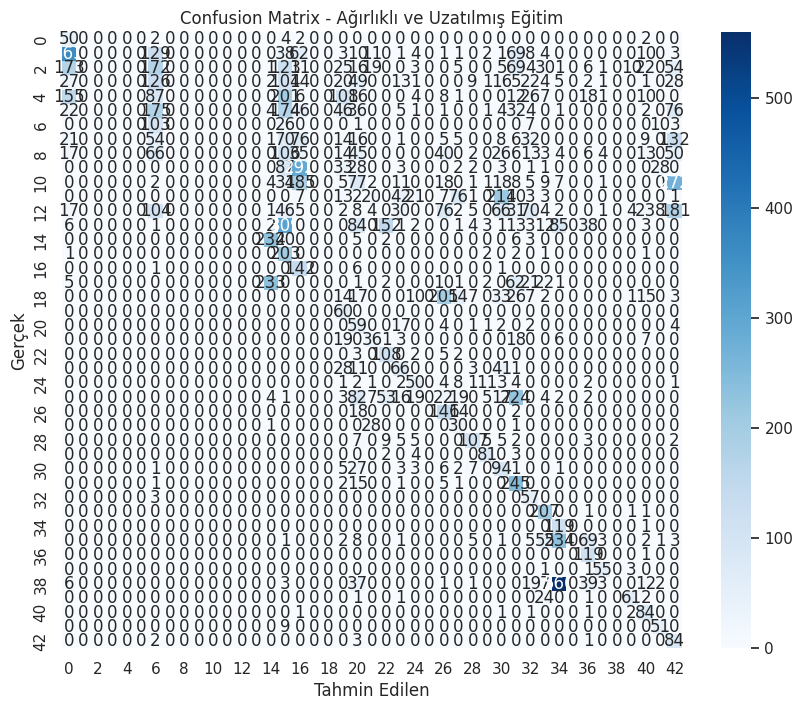

In [ ]:
# Model tanımı (Eğitim süresi uzatılmış)
mlp_weighted_extended = MLPClassifier(
    hidden_layer_sizes=(256, 128),
    activation='tanh',
    solver='sgd',
    learning_rate='constant',
    max_iter=500,
    random_state=42
)

print("Ağırlıklı ve Uzatılmış Eğitim Başlıyor...")
mlp_weighted_extended.fit(X_train_weighted, np.argmax(y_train_weighted, axis=1))  # Yeni ölçeklendirilmiş veri ile eğitim

# Test performansı
y_pred_weighted_extended = mlp_weighted_extended.predict(X_test)
print("Performans (Ağırlıklı ve Uzatılmış Eğitim)")
print(classification_report(np.argmax(y_test, axis=1), y_pred_weighted_extended))

# Confusion Matrix
cm_weighted_extended = confusion_matrix(np.argmax(y_test, axis=1), y_pred_weighted_extended)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_weighted_extended, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Ağırlıklı ve Uzatılmış Eğitim")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Eğitim Süresi Uzatılmış Model Başlıyor...
Performans (Eğitim Süresi Uzatılmış Model)
              precision    recall  f1-score   support

           0       0.82      0.30      0.44        60
           1       0.79      0.87      0.83       720
           2       0.82      0.91      0.86       750
           3       0.79      0.85      0.82       450
           4       0.85      0.84      0.84       660
           5       0.73      0.85      0.79       630
           6       0.93      0.73      0.82       150
           7       0.89      0.77      0.83       450
           8       0.81      0.83      0.82       450
           9       0.94      0.93      0.93       480
          10       0.93      0.96      0.95       660
          11       0.85      0.89      0.87       420
          12       0.99      0.95      0.97       690
          13       0.97      0.97      0.97       720
          14       0.98      0.92      0.95       270
          15       0.93      0.90      0.91       

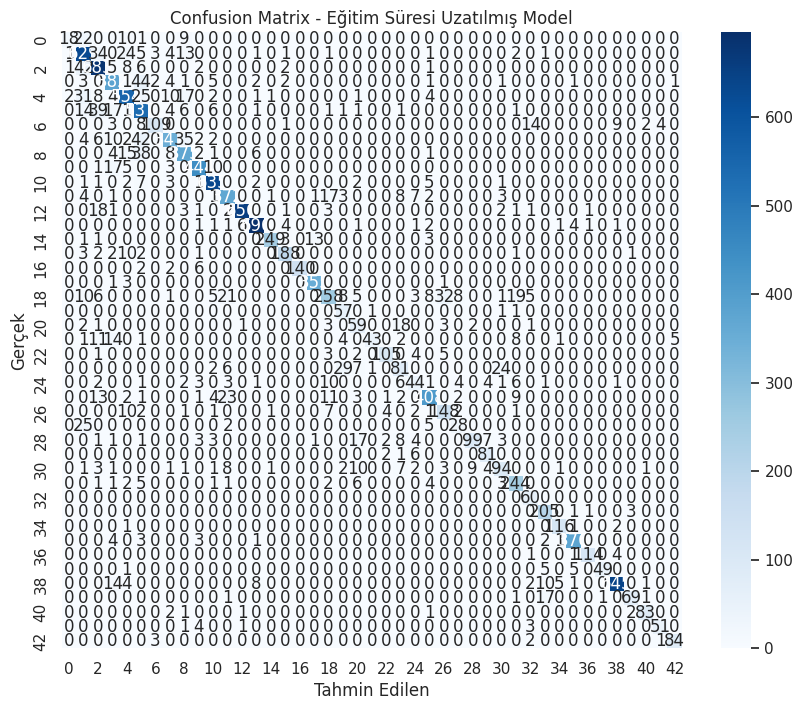

In [ ]:
# Eğitim süresini uzatarak yeniden eğitim
mlp_extended = MLPClassifier(
    hidden_layer_sizes=(256, 128),  # GridSearchCV ile bulunan en iyi katmanlar
    activation='tanh',  # GridSearchCV'den gelen aktivasyon fonksiyonu
    solver='sgd',  # GridSearchCV'den gelen solver
    learning_rate='constant',  # GridSearchCV'den gelen öğrenme oranı
    max_iter=1000,  # Eğitim süresini artırıyoruz
    random_state=42
)

print("Eğitim Süresi Uzatılmış Model Başlıyor...")
mlp_extended.fit(X_train, np.argmax(y_train, axis=1))  # Modeli yeniden eğitiyoruz

# Performansı test et
y_pred_extended = mlp_extended.predict(X_test)
print("Performans (Eğitim Süresi Uzatılmış Model)")
print(classification_report(np.argmax(y_test, axis=1), y_pred_extended))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_extended = confusion_matrix(np.argmax(y_test, axis=1), y_pred_extended)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_extended, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Eğitim Süresi Uzatılmış Model")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

Accuracy (Doğruluk): %87

Eğitim süresinin artırılması, doğruluk oranında bir değişiklik yaratmadı. Ancak, sınıf bazlı performansta bazı iyileşmeler gözlemlendi.

Macro Avg (Ortalama):

Precision: %85

Recall: %82

F1-Score: %83

Bu değerler, GridSearchCV sonrasındaki sonuçlara oldukça benzer. Yani genel performans üzerinde büyük bir değişiklik yaratılmadı.

Weighted Avg (Ağırlıklı Ortalama):

Precision: %87

Recall: %87

F1-Score: %87

Weighted avg değerlerinde önemli bir değişiklik yok.

Düşük Performanslı Sınıflar:

Sınıf 0: Precision %82, Recall %30, F1-Score %44

Model bu sınıfta tahmin yapmada zorlanmaya devam ediyor.

Sınıf 19: Precision %55, Recall %95, F1-Score %70

Bu sınıfta recall çok yüksek, ancak precision hala düşük.

Güçlü Performanslı Sınıflar:

Sınıf 13, 36, 38: Precision ve Recall %95 üzerinde.

Model bu sınıflarda oldukça başarılı performans sergiliyor.


Confusion Matrix Yorumu:

Ana Köşegen: Modelin doğru sınıflandırdığı örnekler.

Köşegen Dışı: Modelin yanlış sınıflandırdığı örnekler.

Genel olarak, çoğu sınıfta doğru sınıflandırma artmış durumda.
